In [1]:
from preprocessing import df, pd

In [2]:
df

,No.,Time,Source IP,Destination IP,Protocol,Length,Source Port,Destination Port,Vendor,Source Mac Address,TCP Flags
0,1,0.000000,192.168.0.107,192.168.0.255,UDP,305,59199.0,54915.0,IntelCor,a0:88:69:e0:2d:d3,None
1,2,0.102253,192.168.0.107,192.168.0.255,UDP,305,54915.0,54915.0,IntelCor,a0:88:69:e0:2d:d3,None
2,3,0.244179,192.168.0.100,192.168.0.2,DNS,81,61098.0,53.0,Apple,8c:85:90:56:69:c0,None
3,4,0.305297,IntelCor_6c:2f:50,Broadcast,ARP,42,NaN,NaN,IntelCor,cc:3d:82:6c:2f:50,None
4,5,0.308302,192.168.0.2,192.168.0.100,ICMP,109,61098.0,53.0,D-LinkIn,3c:1e:04:12:86:d8,None
...,...,...,...,...,...,...,...,...,...,...,...
117328,117329,71.852720,192.168.0.100,192.168.0.121,TCP,66,80.0,64484.0,Apple,8c:85:90:56:69:c0,"(SYN, ACK)"
117329,117330,71.852737,192.168.0.100,192.168.0.121,TCP,66,80.0,64463.0,Apple,8c:85:90:56:69:c0,"(SYN, ACK)"
117330,117331,71.852776,192.168.0.100,192.168.0.121,TCP,66,80.0,64464.0,Apple,8c:85:90:56:69:c0,"(SYN, ACK)"
117331,117332,71.866342,192.168.0.100,192.168.0.104,TCP,460,80.0,58082.0,Apple,8c:85:90:56:69:c0,"(FIN, PSH, ACK)"


### Source Ports involved in the attack


In [3]:
attack_entries = df.loc[df['Destination IP'] == "192.168.0.100"]
attack_entries = attack_entries.loc[attack_entries['Protocol'] == 'TCP']
attack_entries

,No.,Time,Source IP,Destination IP,Protocol,Length,Source Port,Destination Port,Vendor,Source Mac Address,TCP Flags
128,129,19.975082,192.168.0.112,192.168.0.100,TCP,66,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,SYN
130,131,19.977576,192.168.0.112,192.168.0.100,TCP,54,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,ACK
132,133,19.994433,192.168.0.112,192.168.0.100,TCP,80,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,"(PSH, ACK)"
136,137,19.997342,192.168.0.112,192.168.0.100,TCP,54,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,ACK
137,138,20.011530,192.168.0.112,192.168.0.100,TCP,80,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,"(PSH, ACK)"
...,...,...,...,...,...,...,...,...,...,...,...
117313,117314,71.852104,192.168.0.121,192.168.0.100,TCP,66,64483.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN
117314,117315,71.852105,192.168.0.121,192.168.0.100,TCP,66,64462.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN
117315,117316,71.852106,192.168.0.121,192.168.0.100,TCP,66,64484.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN
117316,117317,71.852107,192.168.0.121,192.168.0.100,TCP,66,64463.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN


In [4]:
min_source_port = attack_entries['Source Port'].min()
max_source_port = attack_entries['Source Port'].max()
print("The Source ports that are used in the attack are in the range between port {} and port {}.".format(int(min_source_port), int(max_source_port)))

The Source ports that are used in the attack are in the range between port 13501 and port 64827.


### TCP Flags involved
What is the distribution/frequency of TCP flags involved in the attack?


The Most TCP Flags were send by (PSH, ACK), namely 27339 packets.


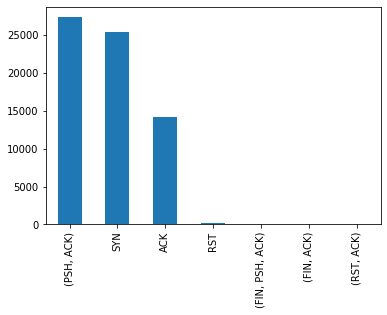

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

value_counts = attack_entries['TCP Flags'].value_counts()
print("The Most TCP Flags were send by {}, namely {} packets.".format(value_counts.idxmax(), value_counts.max()))
flags = value_counts
flags.plot.bar()
plt.show()

### How much was the data rate peak of the attack [Mbits/second]?

The data rate peak was at 28 seconds with 1450888.0 Mbits/second.


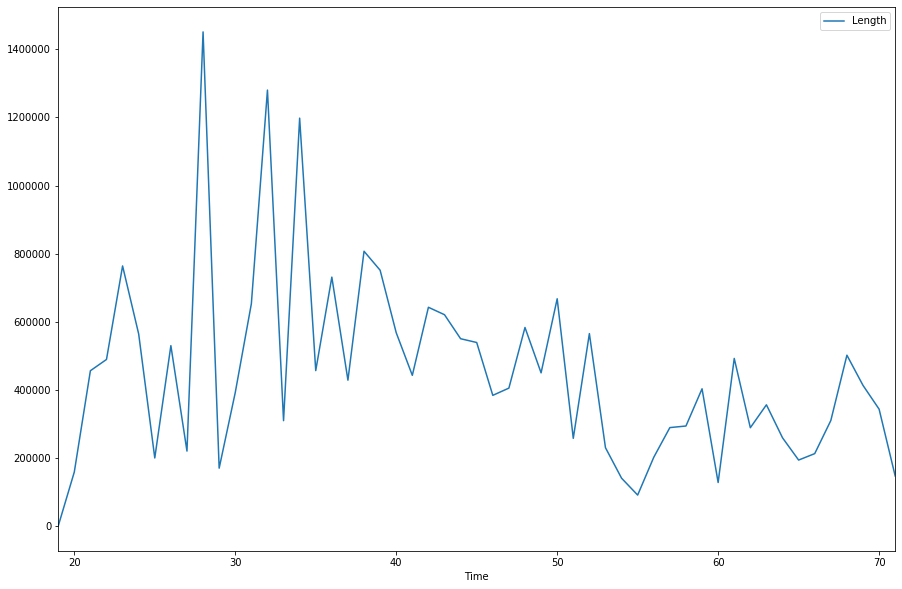

In [28]:
entries = attack_entries
entries['Time'] = entries['Time'].apply(int)
data_rate = entries.groupby(['Time']).sum()
data_rate.plot.line(y='Length', figsize=(15,10))
print("The data rate peak was after {} seconds with {} Mbits/second.".format(data_rate.idxmax()['Length'], data_rate.max()['Length']))
plt.ylabel('')
plt.show()

### What is the distribution/frequency of packet length ("total length")?

Maximum category had 45404 packets in it.


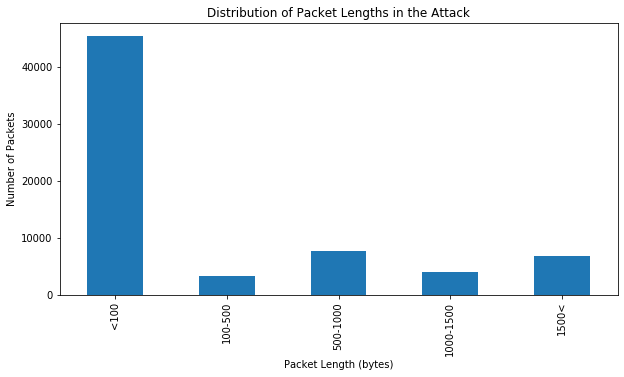

In [7]:
# attack_entries['Length'].value_counts().head(20).plot.bar(figsize=(20, 10))
ranges = [0, 100, 500, 1000, 1500, 10000]
categories = attack_entries.groupby(pd.cut(attack_entries['Length'], ranges, labels=['<100', '100-500', '500-1000', '1000-1500', '1500<'])).count()['Length']
print("Maximum category had {} packets in it.".format(categories.max()))
categories.plot.bar(figsize=(10, 5))
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Number of Packets')
plt.title('Distribution of Packet Lengths in the Attack')
plt.show()